<a href="https://colab.research.google.com/github/sillver-0/BERT-pl/blob/main/BERT%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 895 kB 49.7 MB/s 
     |████████████████████████████████| 596 kB 71.8 MB/s 
     |████████████████████████████████| 3.3 MB 47.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


**BERT 훈련**

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
#from transformers import *
import json
from tqdm import tqdm
import os

In [ ]:
import transformers

In [ ]:
from transformers import BertTokenizer

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/csv/1116label.csv')
data.head()

,review,rate
0,I've tried a few antidepressants over the year...,1
1,I was on this pill for almost two years. It do...,0
2,Holy Hell is exactly how I feel. I had been ta...,0
3,This is a waste of money. Did not curb my app...,0
4,"No problems, watch what you eat.",1


In [ ]:
print(len(data))

19633


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

DEBUG:filelock:Attempting to acquire lock 140247932073872 on /root/.cache/huggingface/transformers/6508e60ab3c1200bffa26c95f4b58ac6b6d95fba4db1f195f632fa3cd7bc64cc.437aa611e89f6fc6675a049d2b5545390adbc617e7d655286421c191d2be2791.lock
DEBUG:filelock:Lock 140247932073872 acquired on /root/.cache/huggingface/transformers/6508e60ab3c1200bffa26c95f4b58ac6b6d95fba4db1f195f632fa3cd7bc64cc.437aa611e89f6fc6675a049d2b5545390adbc617e7d655286421c191d2be2791.lock


Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

DEBUG:filelock:Attempting to release lock 140247932073872 on /root/.cache/huggingface/transformers/6508e60ab3c1200bffa26c95f4b58ac6b6d95fba4db1f195f632fa3cd7bc64cc.437aa611e89f6fc6675a049d2b5545390adbc617e7d655286421c191d2be2791.lock
DEBUG:filelock:Lock 140247932073872 released on /root/.cache/huggingface/transformers/6508e60ab3c1200bffa26c95f4b58ac6b6d95fba4db1f195f632fa3cd7bc64cc.437aa611e89f6fc6675a049d2b5545390adbc617e7d655286421c191d2be2791.lock
DEBUG:filelock:Attempting to acquire lock 140247928403792 on /root/.cache/huggingface/transformers/ec84e86ee39bfe112543192cf981deebf7e6cbe8c91b8f7f8f63c9be44366158.ec5c189f89475aac7d8cbd243960a0655cfadc3d0474da8ff2ed0bf1699c2a5f.lock
DEBUG:filelock:Lock 140247928403792 acquired on /root/.cache/huggingface/transformers/ec84e86ee39bfe112543192cf981deebf7e6cbe8c91b8f7f8f63c9be44366158.ec5c189f89475aac7d8cbd243960a0655cfadc3d0474da8ff2ed0bf1699c2a5f.lock


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

DEBUG:filelock:Attempting to release lock 140247928403792 on /root/.cache/huggingface/transformers/ec84e86ee39bfe112543192cf981deebf7e6cbe8c91b8f7f8f63c9be44366158.ec5c189f89475aac7d8cbd243960a0655cfadc3d0474da8ff2ed0bf1699c2a5f.lock
DEBUG:filelock:Lock 140247928403792 released on /root/.cache/huggingface/transformers/ec84e86ee39bfe112543192cf981deebf7e6cbe8c91b8f7f8f63c9be44366158.ec5c189f89475aac7d8cbd243960a0655cfadc3d0474da8ff2ed0bf1699c2a5f.lock
DEBUG:filelock:Attempting to acquire lock 140247928000080 on /root/.cache/huggingface/transformers/226a307193a9f4344264cdc76a12988448a25345ba172f2c7421f3b6810fddad.3dab63143af66769bbb35e3811f75f7e16b2320e12b7935e216bd6159ce6d9a6.lock
DEBUG:filelock:Lock 140247928000080 acquired on /root/.cache/huggingface/transformers/226a307193a9f4344264cdc76a12988448a25345ba172f2c7421f3b6810fddad.3dab63143af66769bbb35e3811f75f7e16b2320e12b7935e216bd6159ce6d9a6.lock


Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

DEBUG:filelock:Attempting to release lock 140247928000080 on /root/.cache/huggingface/transformers/226a307193a9f4344264cdc76a12988448a25345ba172f2c7421f3b6810fddad.3dab63143af66769bbb35e3811f75f7e16b2320e12b7935e216bd6159ce6d9a6.lock
DEBUG:filelock:Lock 140247928000080 released on /root/.cache/huggingface/transformers/226a307193a9f4344264cdc76a12988448a25345ba172f2c7421f3b6810fddad.3dab63143af66769bbb35e3811f75f7e16b2320e12b7935e216bd6159ce6d9a6.lock
DEBUG:filelock:Attempting to acquire lock 140247919294608 on /root/.cache/huggingface/transformers/a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.a64a22196690e0e82ead56f388a3ef3a50de93335926ccfa20610217db589307.lock
DEBUG:filelock:Lock 140247919294608 acquired on /root/.cache/huggingface/transformers/a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.a64a22196690e0e82ead56f388a3ef3a50de93335926ccfa20610217db589307.lock


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

DEBUG:filelock:Attempting to release lock 140247919294608 on /root/.cache/huggingface/transformers/a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.a64a22196690e0e82ead56f388a3ef3a50de93335926ccfa20610217db589307.lock
DEBUG:filelock:Lock 140247919294608 released on /root/.cache/huggingface/transformers/a803e0468a8fe090683bdc453f4fac622804f49de86d7cecaee92365d4a0f829.a64a22196690e0e82ead56f388a3ef3a50de93335926ccfa20610217db589307.lock


In [ ]:
print(tokenizer.encode("Really good for lower back pain,  get me back working fast.  I'm a 49years old builder and highly recommended celebrex.  I would only use it for a few days and  always fixed the problem"))

[101, 8762, 1363, 1111, 2211, 1171, 2489, 117, 1243, 1143, 1171, 1684, 2698, 119, 146, 112, 182, 170, 3927, 4980, 7666, 1385, 15369, 1105, 3023, 6315, 172, 11194, 9730, 1775, 119, 146, 1156, 1178, 1329, 1122, 1111, 170, 1374, 1552, 1105, 1579, 4275, 1103, 2463, 102]


In [ ]:
print(tokenizer.tokenize("Really good for lower back pain,  get me back working fast.  I'm a 49years old builder and highly recommended celebrex.  I would only use it for a few days and  always fixed the problem"))

['Really', 'good', 'for', 'lower', 'back', 'pain', ',', 'get', 'me', 'back', 'working', 'fast', '.', 'I', "'", 'm', 'a', '49', '##ye', '##ars', 'old', 'builder', 'and', 'highly', 'recommended', 'c', '##ele', '##bre', '##x', '.', 'I', 'would', 'only', 'use', 'it', 'for', 'a', 'few', 'days', 'and', 'always', 'fixed', 'the', 'problem']


In [ ]:
def convert_data(data_df):
    global tokenizer
    
    SEQ_LEN = 250
    #SEQ_LEN : 버트에 들어갈 인풋의 길이
    
    tokens, masks, segments, targets = [], [], [], []
    
    for i in tqdm(range(len(data_df))):
        # token : 문장을 토큰화함
        token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, truncation=True, padding='max_length')
       
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        
        # 정답(긍정 : 1 부정 0)을 targets 변수에 저장해 줌
        targets.append(data_df[LABEL_COLUMN][i])

    # tokens, masks, segments, 정답 변수 targets를 numpy array로 지정    
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)

    return [tokens, masks, segments], targets

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_df[LABEL_COLUMN] = data_df[LABEL_COLUMN].astype(int)
    data_x, data_y = convert_data(data_df)
    return data_x, data_y

In [ ]:
TPU = True
if TPU:
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu = 'grpc://' + os.environ['COLAB_TPU_ADDR'])
  tf.config.experimental_connect_to_cluster(resolver)
  tf.tpu.experimental.initialize_tpu_system(resolver)
else:
  pass

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.107.92.122:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.107.92.122:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


In [ ]:
from transformers import TFBertModel

In [ ]:
model = TFBertModel.from_pretrained('bert-base-cased')
SEQ_LEN = 250
token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype = tf.int32, name = 'input_word_ids')
mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype = tf.int32, name = 'input_masks')
segment_inputs = tf.keras.layers.Input((SEQ_LEN), dtype = tf.int32, name = 'input_segment')

bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

DEBUG:filelock:Attempting to acquire lock 140247913353680 on /root/.cache/huggingface/transformers/01800f4158e284e2447020e0124bc3f6aea3ac49848e744594f7cce8ee5ac0a4.a7137b2090d9302d722735af604b4c142ec9d1bfc31be7cbbe230aea9d5cfb76.h5.lock
DEBUG:filelock:Lock 140247913353680 acquired on /root/.cache/huggingface/transformers/01800f4158e284e2447020e0124bc3f6aea3ac49848e744594f7cce8ee5ac0a4.a7137b2090d9302d722735af604b4c142ec9d1bfc31be7cbbe230aea9d5cfb76.h5.lock


Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

DEBUG:filelock:Attempting to release lock 140247913353680 on /root/.cache/huggingface/transformers/01800f4158e284e2447020e0124bc3f6aea3ac49848e744594f7cce8ee5ac0a4.a7137b2090d9302d722735af604b4c142ec9d1bfc31be7cbbe230aea9d5cfb76.h5.lock
DEBUG:filelock:Lock 140247913353680 released on /root/.cache/huggingface/transformers/01800f4158e284e2447020e0124bc3f6aea3ac49848e744594f7cce8ee5ac0a4.a7137b2090d9302d722735af604b4c142ec9d1bfc31be7cbbe230aea9d5cfb76.h5.lock
Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification mode

In [ ]:
bert_outputs = bert_outputs[1]
sentiment_first = tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer = tf.keras.initializers.TruncatedNormal(stddev = 0.02))(bert_outputs)
sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)
sentiment_model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1.0e-5), loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
sentiment_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 250)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 250)]        0                                            
__________________________________________________________________________________________________
input_segment (InputLayer)      [(None, 250)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 108310272   input_word_ids[0][0]             
                                                                 input_masks[0][0]            

In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
def create_sentiment_bert():
  model = TFBertModel.from_pretrained('bert-base-cased')
  token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype = tf.int32, name = 'input_word_ids')
  mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype = tf.int32, name = 'input_masks')
  segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype = tf.int32, name = 'input_segment')
  bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

  bert_outputs = bert_outputs[1]
  sentiment_first = tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev = 0.02))(bert_outputs)
  sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)

  sentiment_model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1.0e-5), loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

  return sentiment_model

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 10)

In [ ]:
results = []
n_iter = 0

for train_index, val_index in kfold.split(data):
  n_iter += 1
  
  train_df = data.iloc[train_index]
  val_df = data.iloc[val_index]
  
  train_df1 = train_df.reset_index()
  val_df1 = val_df.reset_index()

  SEQ_LEN = 250
  BATCH_SIZE = 32
  # 긍부정 문장을 포함하고 있는 칼럼
  DATA_COLUMN = "review"
  # 긍정인지 부정인지를 (1=긍정,0=부정) 포함하고 있는 칼럼
  LABEL_COLUMN = "rate"
  train_X, train_y = load_data(train_df1)
  val_X, val_y = load_data(val_df1)

  if TPU:
    strategy = tf.distribute.experimental.TPUStrategy(resolver)

    with strategy.scope():
      var_name1 = 'Model_' + str(n_iter)
      var_name2 = 'Hist_' + str(n_iter)
      vars()[var_name1] = create_sentiment_bert()
      vars()[var_name2] = vars()[var_name1].fit(train_X, train_y, epochs = 10, shuffle = True, batch_size = 32, validation_data = (val_X, val_y))

      k_accuracy = '%.4f' %(vars()[var_name1].evaluate(val_X, val_y)[1])
      results.append(k_accuracy)

  else:
    var_name1 = 'Model_' + str(n_iter)
    var_name2 = 'Hist_' + str(n_iter)
    vars()[var_name1] = create_sentiment_bert()
    vars()[var_name2] = vars()[var_name1].fit(train_X, train_y, epochs = 10, shuffle = True, batch_size = 32, validation_data = (val_X, val_y))
    
    k_accuracy = '%.4f' %(vars()[var_name1].evaluate(val_X, val_y)[1])
    results.append(k_accuracy)

100%|██████████| 3927/3927 [00:08<00:00, 466.80it/s]


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/opti

Epoch 1/10


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]


491/491 [==============================] - ETA: 0s - loss: 0.4050 - accuracy: 0.8307

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]


491/491 [==============================] - 161s 157ms/step - loss: 0.4050 - accuracy: 0.8307 - val_loss: 0.3418 - val_accuracy: 0.8717
Epoch 2/10
491/491 [==============================] - 56s 113ms/step - loss: 0.2872 - accuracy: 0.8989 - val_loss: 0.3461 - val_accuracy: 0.8793
Epoch 3/10
491/491 [==============================] - 56s 114ms/step - loss: 0.2270 - accuracy: 0.9287 - val_loss: 0.3565 - val_accuracy: 0.8737
Epoch 4/10
491/491 [==============================] - 56s 113ms/step - loss: 0.1885 - accuracy: 0.9445 - val_loss: 0.3661 - val_accuracy: 0.8732
Epoch 5/10
491/491 [==============================] - 56s 114ms/step - loss: 0.1604 - accuracy: 0.9564 - val_loss: 0.3853 - val_accuracy: 0.8765
Epoch 6/10
491/491 [==============================] - 56s 114ms/step - loss: 0.1444 - accuracy: 0.9610 - val_loss: 0.4067 - val_accuracy: 0.8717
Epoch 7/10
491/491 [==============================] - 56s 113ms/step - loss: 0.1269 - accuracy: 0.9668 - val_loss: 0.4355 - val_accuracy: 0.

100%|██████████| 3927/3927 [00:08<00:00, 460.50it/s]


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]


491/491 [==============================] - ETA: 0s - loss: 0.4112 - accuracy: 0.8275

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]


491/491 [==============================] - 165s 157ms/step - loss: 0.4112 - accuracy: 0.8275 - val_loss: 0.3288 - val_accuracy: 0.8775
Epoch 2/10
491/491 [==============================] - 56s 114ms/step - loss: 0.2923 - accuracy: 0.8962 - val_loss: 0.3105 - val_accuracy: 0.8910
Epoch 3/10
491/491 [==============================] - 56s 114ms/step - loss: 0.2330 - accuracy: 0.9255 - val_loss: 0.3349 - val_accuracy: 0.8818
Epoch 4/10
491/491 [==============================] - 56s 114ms/step - loss: 0.1881 - accuracy: 0.9436 - val_loss: 0.3602 - val_accuracy: 0.8768
Epoch 5/10
491/491 [==============================] - 56s 114ms/step - loss: 0.1519 - accuracy: 0.9573 - val_loss: 0.3829 - val_accuracy: 0.8790
Epoch 6/10
491/491 [==============================] - 56s 114ms/step - loss: 0.1258 - accuracy: 0.9650 - val_loss: 0.4302 - val_accuracy: 0.8760
Epoch 7/10
491/491 [==============================] - 56s 114ms/step - loss: 0.1122 - accuracy: 0.9698 - val_loss: 0.4546 - val_accuracy: 0.

100%|██████████| 3927/3927 [00:08<00:00, 466.70it/s]


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]


491/491 [==============================] - ETA: 0s - loss: 0.4123 - accuracy: 0.8305

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]


491/491 [==============================] - 162s 156ms/step - loss: 0.4123 - accuracy: 0.8305 - val_loss: 0.3421 - val_accuracy: 0.8729
Epoch 2/10
491/491 [==============================] - 56s 114ms/step - loss: 0.2884 - accuracy: 0.8982 - val_loss: 0.3379 - val_accuracy: 0.8801
Epoch 3/10
491/491 [==============================] - 56s 114ms/step - loss: 0.2305 - accuracy: 0.9261 - val_loss: 0.3478 - val_accuracy: 0.8757
Epoch 4/10
491/491 [==============================] - 57s 116ms/step - loss: 0.1878 - accuracy: 0.9449 - val_loss: 0.3657 - val_accuracy: 0.8798
Epoch 5/10
491/491 [==============================] - 56s 114ms/step - loss: 0.1558 - accuracy: 0.9570 - val_loss: 0.4009 - val_accuracy: 0.8724
Epoch 6/10
491/491 [==============================] - 56s 114ms/step - loss: 0.1402 - accuracy: 0.9621 - val_loss: 0.4038 - val_accuracy: 0.8768
Epoch 7/10
491/491 [==============================] - 56s 114ms/step - loss: 0.1168 - accuracy: 0.9699 - val_loss: 0.4541 - val_accuracy: 0.

100%|██████████| 3926/3926 [00:08<00:00, 463.59it/s]


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]


491/491 [==============================] - ETA: 0s - loss: 0.4130 - accuracy: 0.8277

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]


491/491 [==============================] - 164s 159ms/step - loss: 0.4130 - accuracy: 0.8277 - val_loss: 0.3315 - val_accuracy: 0.8737
Epoch 2/10
491/491 [==============================] - 57s 116ms/step - loss: 0.2885 - accuracy: 0.8991 - val_loss: 0.3369 - val_accuracy: 0.8818
Epoch 3/10
491/491 [==============================] - 56s 114ms/step - loss: 0.2320 - accuracy: 0.9257 - val_loss: 0.3421 - val_accuracy: 0.8782
Epoch 4/10
491/491 [==============================] - 56s 115ms/step - loss: 0.1910 - accuracy: 0.9432 - val_loss: 0.3588 - val_accuracy: 0.8813
Epoch 5/10
491/491 [==============================] - 57s 115ms/step - loss: 0.1569 - accuracy: 0.9551 - val_loss: 0.4067 - val_accuracy: 0.8744
Epoch 6/10
491/491 [==============================] - 56s 115ms/step - loss: 0.1378 - accuracy: 0.9614 - val_loss: 0.4420 - val_accuracy: 0.8752
Epoch 7/10
491/491 [==============================] - 56s 115ms/step - loss: 0.1150 - accuracy: 0.9664 - val_loss: 0.4529 - val_accuracy: 0.

100%|██████████| 3926/3926 [00:08<00:00, 467.43it/s]


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/10


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]


491/491 [==============================] - ETA: 0s - loss: 0.4159 - accuracy: 0.8238

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]


491/491 [==============================] - 169s 159ms/step - loss: 0.4159 - accuracy: 0.8238 - val_loss: 0.3401 - val_accuracy: 0.8752
Epoch 2/10
491/491 [==============================] - 56s 114ms/step - loss: 0.2911 - accuracy: 0.8991 - val_loss: 0.3347 - val_accuracy: 0.8798
Epoch 3/10
491/491 [==============================] - 56s 115ms/step - loss: 0.2336 - accuracy: 0.9255 - val_loss: 0.3534 - val_accuracy: 0.8818
Epoch 4/10
491/491 [==============================] - 57s 115ms/step - loss: 0.1906 - accuracy: 0.9440 - val_loss: 0.3709 - val_accuracy: 0.8772
Epoch 5/10
491/491 [==============================] - 57s 115ms/step - loss: 0.1581 - accuracy: 0.9562 - val_loss: 0.3840 - val_accuracy: 0.8760
Epoch 6/10
491/491 [==============================] - 57s 115ms/step - loss: 0.1373 - accuracy: 0.9625 - val_loss: 0.4126 - val_accuracy: 0.8686
Epoch 7/10
491/491 [==============================] - 57s 116ms/step - loss: 0.1161 - accuracy: 0.9682 - val_loss: 0.4749 - val_accuracy: 0.

In [ ]:
print('\nK-fold cross validation Accuracy: {}'.format(results))
#print(f'Mean-Precision: {sum(results) / len(results)}')


K-fold cross validation Accuracy: ['0.8780', '0.8727', '0.8602', '0.8678', '0.8726']


In [ ]:
print('\nK-fold cross validation Accuracy: {}'.format(results))
#print(f'Mean-Precision: {sum(results) / len(results)}')


K-fold cross validation Accuracy: ['0.8780', '0.8727', '0.8602', '0.8678', '0.8726']


In [ ]:
#Hist1: val_acc = 0.8673
#Hist2: val_acc = 0.8798
#Hist3: val_acc = 0.8770
#Hist4: val_acc = 0.8775
#Hist5: val_acc = 0.8655

In [ ]:
Hist_2.history

{'accuracy': [0.8189863562583923,
  0.8944352269172668,
  0.9249967932701111,
  0.9437794089317322,
  0.9574684500694275,
  0.963326096534729,
  0.969565749168396,
  0.971284806728363,
  0.9740862846374512,
  0.9772061109542847],
 'loss': [0.4225600063800812,
  0.2946835458278656,
  0.23350484669208527,
  0.1874416619539261,
  0.15297861397266388,
  0.13338668644428253,
  0.1170346587896347,
  0.1088903471827507,
  0.09831134229898453,
  0.08711142092943192],
 'val_accuracy': [0.8759867548942566,
  0.8905016779899597,
  0.8563789129257202,
  0.8838807940483093,
  0.8790425062179565,
  0.8805704116821289,
  0.8780239224433899,
  0.8813343644142151,
  0.8854086995124817,
  0.8777692914009094],
 'val_loss': [0.33390575647354126,
  0.30323290824890137,
  0.4030449092388153,
  0.35188984870910645,
  0.3869025707244873,
  0.38123977184295654,
  0.4193872809410095,
  0.4218500852584839,
  0.4229615032672882,
  0.4549716114997864]}

In [ ]:
print(Hist_2.history['loss'])
print(Hist_2.history['accuracy'])
print(Hist_2.history['val_loss'])
print(Hist_2.history['val_accuracy'])

[0.4225600063800812, 0.2946835458278656, 0.23350484669208527, 0.1874416619539261, 0.15297861397266388, 0.13338668644428253, 0.1170346587896347, 0.1088903471827507, 0.09831134229898453, 0.08711142092943192]
[0.8189863562583923, 0.8944352269172668, 0.9249967932701111, 0.9437794089317322, 0.9574684500694275, 0.963326096534729, 0.969565749168396, 0.971284806728363, 0.9740862846374512, 0.9772061109542847]
[0.33390575647354126, 0.30323290824890137, 0.4030449092388153, 0.35188984870910645, 0.3869025707244873, 0.38123977184295654, 0.4193872809410095, 0.4218500852584839, 0.4229615032672882, 0.4549716114997864]
[0.8759867548942566, 0.8905016779899597, 0.8563789129257202, 0.8838807940483093, 0.8790425062179565, 0.8805704116821289, 0.8780239224433899, 0.8813343644142151, 0.8854086995124817, 0.8777692914009094]


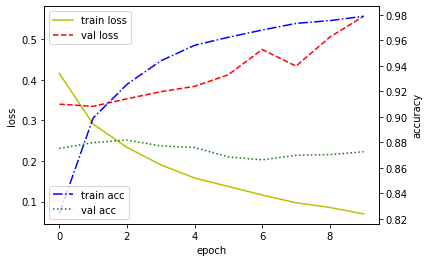

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(Hist_5.history['loss'], 'y', label = 'train loss')
loss_ax.plot(Hist_5.history['val_loss'], 'r--', label = 'val loss')

acc_ax.plot(Hist_5.history['accuracy'], 'b-.', label = 'train acc')
acc_ax.plot(Hist_5.history['val_accuracy'], 'g:', label = 'val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

#plt.show()
plt.savefig('/content/gdrive/My Drive/Colab Notebooks/1016hist5_1.png', dpi = 1000)

**훈련한 BERT모델로 긍부정 예측**

In [ ]:
def predict_convert_data(data_df):
  global tokenizer
  tokens, masks, segments = [], [], []

  for i in tqdm(range(len(data_df))):

    token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length = SEQ_LEN, truncation = True, padding = 'max_length')
    num_zeros = token.count(0)
    mask = [1]*(SEQ_LEN - num_zeros) + [0]*num_zeros
    segment = [0]*SEQ_LEN

    tokens.append(token)
    masks.append(mask)
    segments.append(segment)

  tokens = np.array(tokens)
  masks = np.array(masks)
  segments = np.array(segments)

  return [tokens, masks, segments]

def predict_load_data(pandas_dataframe):
  data_df = pandas_dataframe
  data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
  data_x = predict_convert_data(data_df)

  return data_x

In [ ]:
#얘도 마지막거라서 의미 없음
test_set = predict_load_data(val_df1)

100%|██████████| 3926/3926 [00:07<00:00, 519.32it/s]


In [ ]:
test_set

[array([[  101,  3930,  5479, ...,     0,     0,     0],
        [  101,   180,  4934, ...,     0,     0,     0],
        [  101,   123,   119, ...,     0,     0,     0],
        ...,
        [  101,  2868,  2946, ...,     0,     0,     0],
        [  101,   140,  5815, ...,     0,     0,     0],
        [  101, 27652,  1106, ...,     0,     0,     0]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [ ]:
with strategy.scope():
  preds = sentiment_model.predict(test_set)

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>]


In [ ]:
preds

array([[0.61840266],
       [0.61545134],
       [0.6239005 ],
       ...,
       [0.6233344 ],
       [0.61424005],
       [0.612659  ]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
y_true = val_df1['rate']
print(classification_report(y_true, np.round(preds, 0)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1954
           1       0.50      1.00      0.67      1972

    accuracy                           0.50      3926
   macro avg       0.25      0.50      0.33      3926
weighted avg       0.25      0.50      0.34      3926



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def compare_base_and_treat(base, treat):
  labels = np.unique(base)
  cm = confusion_matrix(base, treat, labels = labels)
  d1 = {'class': labels}
  corrects = []
  for idx, label in enumerate(labels):
    d1[label] = cm[:, idx]
    corrects.append(cm[idx, idx])
  d1['count'] = np.sum(cm, axis = 1)
  d1['correct'] = np.array(corrects)
  d1['correct_percent'] = np.round(d1[correct] / d1['count'] * 100, decimals = 1)
  num_tot_count = np.sum(d1['count'])
  num_tot_correct_count = np.sum(d1['correct'])
  accuracy = round(num_tot_correct_count / num_tot_count * 100, 1)
  if set([0, 1]) == set(labels):
    f1 = round(f1_score(base, treat, average = 'binary'), 2)
  else:
    f1 = round(f1_score(base, treat, average = 'weighted'), 2)
  
  df = pd.DataFrame(d1)
  print(df.to_string(index = False))
  print('-'*65)
  print(' total count: {} correct: {}({}%) f1_score: {}' .format(num_tot_count, num_tot_correct_count, accuracy, f1))
  print('-'*65)

  return (accuracy, f1, df)

In [ ]:
import logging
tf.get_logger().setLevel(logging.ERROR)

In [ ]:
def sentence_convert_data(data):
  global tokenizer
  tokens, masks, segments = [], [], []
  token = tokenizer.encode(data, max_length = SEQ_LEN, truncation = True, padding = 'max_length')

  num_zeros = token.count(0)
  mask = [1]*(SEQ_LEN - num_zeros) + [0]*num_zeros
  segment = [0]*SEQ_LEN

  tokens.append(token)
  masks.append(mask)
  segments.append(segment)

  tokens = np.array(tokens)
  masks = np.array(masks)
  segments = np.array(segments)

  return [tokens, masks, segments]

def evaluation_predict(sentence):
  data_x = sentence_convert_data(sentence)
  predict = Model_2.predict(data_x)
  predict_value = np.ravel(predict)
  predict_answer = np.round(predict_value, 0).item()

  return [predict_answer, predict_value]

In [ ]:
drugs = "This is a waste of money.  Did not curb my appetite nor did it make me feel full."

In [ ]:
evaluation_predict(drugs)

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 250) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 250) dtype=int64>]


[0.0, array([0.00121862], dtype=float32)]

비교를 위해 BERT로 celecoxib, naproxen, ibuprofen을 감성분석

In [ ]:
celecoxib = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/csv/celecoxib.csv')

In [ ]:
score_c = []
pos = []
pos_half = []
neg = []
neg_half = []
eval_list = []

for sentence in celecoxib['review']:
  predict = evaluation_predict(sentence)      #리뷰를 bert로 예측
  score = predict[1].tolist()[0]
  score_c.append(score)

  if predict[0] == 1:                         #예측 레이블이 1일 경우
    eval_list.append(1)                       #label을 1로
    if score >= 0.9:                          #레이블이 1인 것 중에 예측 점수가 0.9 이상일 경우
      pos.append(score)                       #긍정 리스트에 예측 점수 추가
    elif (score >= 0.5 and score < 0.9):      #예측 점수가 0.5 이상 0.9 미만일 경우
      pos_half.append(score)                  #긍정_절반(중립에 가까운 긍정)에 예측 점수 추가
  elif predict[0] == 0:                       #예측 레이블이 0일 경우
    eval_list.append(0)                       #label을 0으로
    if (score < 0.5 and score > 0.1):         #레이블이 0인 것 중에 예측 점수가 0.1 초과 0.5 미만일 경우
      neg_half.append(-(1-score))             #부정_절반(중립에 가까운 부정)에 예측 점수 추가 (편의를 위해 -(1-score)로)
    elif score <= 0.1:                        #예측 점수가 0.1 이하일 경우
      neg.append(-(1-score))                  #부정 리스트에 예측 점수 추가
'''
all = pos + neg
pos_per = pos / all * 100
neg_per = neg / all * 100

print('celecoxib 긍정 확률: {:.2f}%'.format(pos_per))
print('celecoxib 부정 확률: {:.2f}%'.format(neg_per))
'''

print(len(neg))
print(sum(neg))
print(sum(neg) / len(neg))
print(len(neg_half))
print(sum(neg_half))
print(sum(neg_half) / len(neg_half))
print(len(pos_half))
print(sum(pos_half))
print(sum(pos_half) / len(pos_half))
print(len(pos))
print(sum(pos))
print(sum(pos) / len(pos))

253
-248.59520760178566
-0.9825897533667417
45
-33.79148241877556
-0.7509218315283458
41
31.84522181749344
0.7767127272559375
265
260.9464285373688
0.9847035039145992


In [ ]:
celecoxib['rating'] = eval_list
celecoxib.head()

,review,rating
0,dosen't seem to help,0
1,Female diagnosed with Reactive Arthritis 2014 ...,1
2,Took these capsules as prescribed by doctor wh...,0
3,Have yet to have an issue. Helped get me off o...,1
4,"Really good for lower back pain, get me back ...",1


In [ ]:
celecoxib.to_csv('/content/gdrive/My Drive/Colab Notebooks/csv/0730celecoxib.csv')

In [ ]:
test_c = []
for k in range(len(score_c)):
  test_c.append(round(score_c[k], 2))
print(test_c[:5])

[0.01, 1.0, 0.0, 1.0, 1.0]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

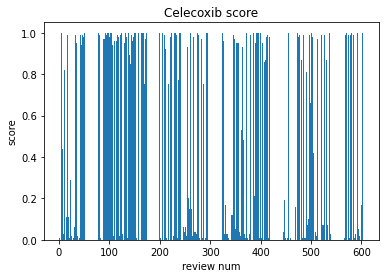

In [ ]:
xx = range(1, len(test_c) + 1)
plt.bar(xx, test_c)
plt.title('Celecoxib score')
plt.ylabel('score')
plt.xlabel('review num')
plt.show()

In [ ]:
score_list_c = []
for k in range(len(score_c)):
  score_list_c.append(round(score_c[k], 1))
print(score_list_c[:5])

[0.0, 1.0, 0.0, 1.0, 1.0]


In [ ]:
from collections import Counter
score_cc = Counter(score_list_c)
score_cc

Counter({0.0: 228,
         0.1: 36,
         0.2: 16,
         0.3: 8,
         0.4: 4,
         0.5: 7,
         0.6: 4,
         0.7: 9,
         0.8: 11,
         0.9: 41,
         1.0: 240})

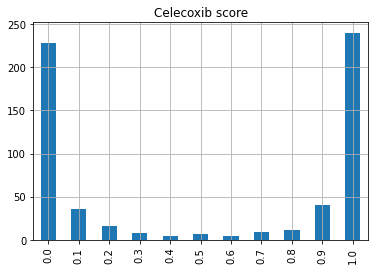

In [ ]:
cel_data =pd.Series(score_cc)
cel = cel_data.sort_index()
cel.plot(kind = 'bar', grid = True, title = 'Celecoxib score')

In [ ]:
naproxen = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/csv/naproxen.csv')

In [ ]:
score_n = []
pos = []
pos_half = []
neg = []
neg_half = []
n_eval_list = []

for sentence in naproxen['review']:
  predict = evaluation_predict(sentence)
  score = predict[1].tolist()[0]
  score_n.append(score)

  if predict[0] == 1:
    n_eval_list.append(1)
    if score >= 0.9:
      pos.append(score)
    elif (score >= 0.5 and score < 0.9):
      pos_half.append(score)
  elif predict[0] == 0:
    n_eval_list.append(0)
    if (score < 0.5 and score > 0.1):
      neg_half.append(-(1-score))
    elif score <= 0.1:
      neg.append(-(1-score))
'''
all = pos + neg
pos_per = pos / all * 100
neg_per = neg / all * 100

print('naproxen 긍정 확률: {:.2f}%'.format(pos_per))
print('naproxen 부정 확률: {:.2f}%'.format(neg_per))
'''
print(len(neg))
print(sum(neg))
print(sum(neg) / len(neg))
print(len(neg_half))
print(sum(neg_half))
print(sum(neg_half) / len(neg_half))
print(len(pos_half))
print(sum(pos_half))
print(sum(pos_half) / len(pos_half))
print(len(pos))
print(sum(pos))
print(sum(pos) / len(pos))

309
-303.8961842954159
-0.9834827970725433
43
-32.96630421280861
-0.766658237507177
91
69.23008167743683
0.7607701283234817
418
411.8279153108597
0.9852342471551667


In [ ]:
naproxen['rating'] = n_eval_list
naproxen.head()

,review,rating
0,Amazing amazing amazing! They are like magic p...,1
1,"These work really well for me, reading these r...",1
2,Naproxen works well for my migraines. I always...,1
3,Was prescribed prescription strength Naproxen ...,0
4,"I took the naproxen after eating some food, bu...",0


In [ ]:
naproxen.to_csv('/content/gdrive/My Drive/Colab Notebooks/csv/0730naproxen.csv')

In [ ]:
test_n = []
for k in range(len(score_n)):
  test_n.append(round(score_n[k], 2))
print(test_n[:5])

[0.99, 1.0, 0.93, 0.0, 0.02]


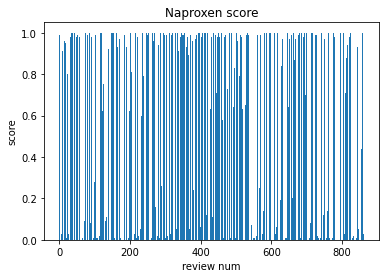

In [ ]:
xx = range(1, len(test_n) + 1)
plt.bar(xx, test_n)
plt.title('Naproxen score')
plt.ylabel('score')
plt.xlabel('review num')
plt.show()

In [ ]:
score_list_n = []
for k in range(len(score_n)):
  score_list_n.append(round(score_n[k], 1))
print(score_list_n[:5])

[1.0, 1.0, 0.9, 0.0, 0.0]


In [ ]:
score_nn = Counter(score_list_n)
score_nn

Counter({0.0: 276,
         0.1: 47,
         0.2: 12,
         0.3: 10,
         0.4: 5,
         0.5: 2,
         0.6: 15,
         0.7: 24,
         0.8: 29,
         0.9: 60,
         1.0: 381})

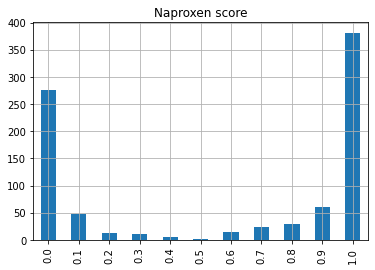

In [ ]:
nap_data =pd.Series(score_nn)
nap = nap_data.sort_index()
nap.plot(kind = 'bar', grid = True, title = 'Naproxen score')

In [ ]:
ibuprofen = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/csv/ibuprofen.csv')

In [ ]:
score_i = []
pos = []
pos_half = []
neg = []
neg_half = []
i_eval_list = []

for sentence in ibuprofen['review']:
  predict = evaluation_predict(sentence)
  score = predict[1].tolist()[0]
  score_i.append(score)

  if predict[0] == 1:
    i_eval_list.append(1)
    if score >= 0.9:
      pos.append(score)
    elif (score >= 0.5 and score < 0.9):
      pos_half.append(score)
  elif predict[0] == 0:
    i_eval_list.append(0)
    if (score < 0.5 and score > 0.1):
      neg_half.append(-(1-score))
    elif score <= 0.1:
      neg.append(-(1-score))

'''
all = pos + neg
pos_per = pos / all * 100
neg_per = neg / all * 100

print('ibuprofen 긍정 확률: {:.2f}%'.format(pos_per))
print('ibuprofen 부정 확률: {:.2f}%'.format(neg_per))
'''
print(len(neg))
print(sum(neg))
print(sum(neg) / len(neg))
print(len(neg_half))
print(sum(neg_half))
print(sum(neg_half) / len(neg_half))
print(len(pos_half))
print(sum(pos_half))
print(sum(pos_half) / len(pos_half))
print(len(pos))
print(sum(pos))
print(sum(pos) / len(pos))

83
-81.82603818178177
-0.985855881708214
24
-17.33291122317314
-0.7222046342988809
31
23.659591853618622
0.7632126404393104
147
145.01055830717087
0.9864663830419786


In [ ]:
ibuprofen['rating'] = i_eval_list
ibuprofen.head()

,review,rating
0,"I get frequent headaches. By frequent, I mean ...",1
1,it helped my cramps go for a couple of hours b...,0
2,I've had dehabilitating period pain since I st...,1
3,Advil works great for inflammation and pain bu...,1
4,Doesnt work at all for severe cramps :(((,0


In [ ]:
ibuprofen.to_csv('/content/gdrive/My Drive/Colab Notebooks/csv/0730ibuprofen.csv')

In [ ]:
test_i = []
for k in range(len(score_i)):
  test_i.append(round(score_i[k], 2))
print(test_i[:5])

[0.92, 0.0, 0.87, 0.83, 0.0]


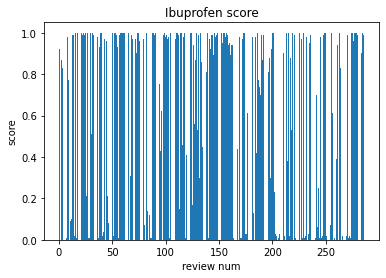

In [ ]:
xx = range(1, len(test_i) + 1)
plt.bar(xx, test_i)
plt.title('Ibuprofen score')
plt.ylabel('score')
plt.xlabel('review num')
plt.show()

In [ ]:
score_list_i = []
for k in range(len(score_i)):
  score_list_i.append(round(score_i[k], 1))
print(score_list_i[:5])

[0.9, 0.0, 0.9, 0.8, 0.0]


In [ ]:
score_ii = Counter(score_list_i)
score_ii

Counter({0.0: 78,
         0.1: 11,
         0.2: 6,
         0.3: 3,
         0.4: 8,
         0.5: 4,
         0.6: 4,
         0.7: 5,
         0.8: 7,
         0.9: 22,
         1.0: 137})

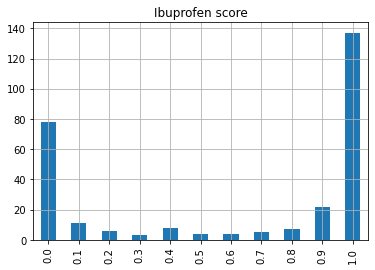

In [ ]:
ibu_data =pd.Series(score_ii)
ibu = ibu_data.sort_index()
ibu.plot(kind = 'bar', grid = True, title = 'Ibuprofen score')

 BERT+ 알고리즘 이용하여 celecoxib, ibuprofen, naproxen 감성 분석

In [ ]:
import re

sentence_list = []
for sentence in celecoxib['review']:
  sent_list = []
  for sent in re.split('[.?!]\s+', sentence):
    sent_list.append(sent)
  sentence_list.append(sent_list)

In [ ]:
celecoxib['sentence'] = sentence_list
celecoxib.head()

,review,rating,sentence
0,dosen't seem to help,0,[dosen't seem to help]
1,Female diagnosed with Reactive Arthritis 2014 ...,1,[Female diagnosed with Reactive Arthritis 2014...
2,Took these capsules as prescribed by doctor wh...,0,[Took these capsules as prescribed by doctor w...
3,Have yet to have an issue. Helped get me off o...,1,"[Have yet to have an issue, Helped get me off ..."
4,"Really good for lower back pain, get me back ...",1,"[Really good for lower back pain, get me back..."


In [ ]:
count = []
for k in range(len(celecoxib)):
  count.append(len(celecoxib['sentence'][k]))

celecoxib['sent_count'] = count
celecoxib.head()

,review,rating,sentence,sent_count
0,dosen't seem to help,0,[dosen't seem to help],1
1,Female diagnosed with Reactive Arthritis 2014 ...,1,[Female diagnosed with Reactive Arthritis 2014...,16
2,Took these capsules as prescribed by doctor wh...,0,[Took these capsules as prescribed by doctor w...,5
3,Have yet to have an issue. Helped get me off o...,1,"[Have yet to have an issue, Helped get me off ...",3
4,"Really good for lower back pain, get me back ...",1,"[Really good for lower back pain, get me back...",3


In [ ]:
np.mean(count)

4.066225165562914

In [ ]:
file = open('/content/gdrive/My Drive/Colab Notebooks/csv/side_effect.txt', mode = 'r', encoding = 'utf-8')
se = []
side = file.read()
side = side.splitlines()

for line in side:
  se.append(line)
  file.close()

se[:5]

['Cough', 'fever', 'skin rash', 'sneezing', 'sore throat']

In [ ]:
se_l = []
for word in se:
  word = re.sub('[-=+#/\?:^$.@*\"~&!"]', '', word)
  word = word.lower()
  se_l.append(word)
se_l[:5]

['cough', 'fever', 'skin rash', 'sneezing', 'sore throat']

In [ ]:
review_count = []
sent_count = []
sent_word = []
for sentence in sentence_list:      #sentence_list는 리뷰를 문장으로 나눠놓은 리스트(기준은 ,)
  re_count = 0
  for line in sentence:             #line?
    count = 0
    se_word = []
    for word in line.split():       #문장을 단어로 나눠놨을 때(기준은 )
      if word in se_l:              #단어가 se_l(부작용 단어 리스트)안에 있으면
        count += 1                  #count에 1 더하기
        re_count += count           #re_count에 count 더하기 -> count는 한 문장 내의 부작용 단어 수, re_count는 한 리뷰 내의 부작용 단어 수
        se_word.append(word)        #se_word에는 리뷰 내에서 나온 부작용 단어 넣기
    sent_count.append(count)        #sent_count에 count 더하기 = 부작용 단어 갯수
    sent_word.append(se_word)       #sent_word에 se_word 더하기 = 어떤 부작용 단어가 등장했는지
  review_count.append(re_count)     #review_count는 각각의 re_count로 이루어진 리스트
print(sent_count[:22])
print(sent_word[:5])
print(review_count[:5])

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
[[], [], [], [], []]
[0, 2, 2, 0, 0]


In [ ]:
print(np.mean(sent_count))
print(np.mean(review_count))

0.27890879478827363
1.294701986754967


In [ ]:
celecoxib['review_count'] = review_count
celecoxib.head()

,review,rating,sentence,sent_count,review_count
0,dosen't seem to help,0,[dosen't seem to help],1,0
1,Female diagnosed with Reactive Arthritis 2014 ...,1,[Female diagnosed with Reactive Arthritis 2014...,16,2
2,Took these capsules as prescribed by doctor wh...,0,[Took these capsules as prescribed by doctor w...,5,2
3,Have yet to have an issue. Helped get me off o...,1,"[Have yet to have an issue, Helped get me off ...",3,0
4,"Really good for lower back pain, get me back ...",1,"[Really good for lower back pain, get me back...",3,0


In [ ]:
#bert+에서는 부작용 단어의 수 사용하지 않음

rating = []
for i in celecoxib.index:
  rev = celecoxib.loc[i, 'review']                                          #rev는 review 의미
  pos = 0
  neg = 0
  predict = evaluation_predict(rev)                                         #리뷰를 bert 예측한 결과를 predict라고 함

  if (predict[1].tolist()[0] < 0.9) and (predict[1].tolist()[0] > 0.1):     #만약 예측 점수가 0.9보다 작고 0.1보다 크면, 즉 중립 리뷰이면
    for k in range(celecoxib.loc[i, 'sent_count']):                         #각 리뷰 내의 문장 갯수 만큼 for문 돌림
      pos = 0
      neg = 0
      sent = celecoxib.loc[i, 'sentence'][k]                                #sent를 리뷰 내의 각 문장이라고 함
      predict_sent = evaluation_predict(sent)                               #각 문장을 bert 예측함
      if predict_sent[0] == 1:                                              #문장 예측 label이 1이면,
        pos += 1                                                            #pos에 1 더함
      elif predict_sent[0] == 0:                                            #문장 예측 label이 0이면,
        neg += 1                                                            #neg에 1 더함

    if pos > neg:                                                         #리뷰 내의 모든 문장을 예측했을 때, 긍정 문장이 부정 문장 보다 많으면,
      rating.append(1)                                                    #해당 리뷰를 긍정이라고 판단
    elif pos < neg:                                                       #리뷰 내의 모든 문장을 예측했을 때, 부정 문장이 긍정 문장 보다 많으면,
      rating.append(0)                                                    #해당 리뷰를 부정이라고 판단
    elif pos == neg:                                                      #리뷰 내의 모든 문장을 예측했을 때, 긍정 문장 수와 부정 문장 수가 같으면,
      rating.append(predict[0])                                           #predict의 label, 즉 문장이 아닌 리뷰를 예측한 결과를 사용함

  else:                                                                     #리뷰 예측 점수가 0.9보다 크거나 0.1보다 작으면, 즉 점수가 확실하면
    rating.append(predict[0])                                               #predict의 label, 즉 문장이 아닌 리뷰를 예측한 결과를 그대로 사용함

print(rating[:5])

[0.0, 1.0, 0.0, 1.0, 1.0]


In [ ]:
print(len(rating))
print(len(celecoxib))

604
604


In [ ]:
celecoxib['rating2_bert+'] = rating
celecoxib.head()

,review,rating,sentence,sent_count,review_count,rating2_bert+
0,dosen't seem to help,0,[dosen't seem to help],1,0,0.0
1,Female diagnosed with Reactive Arthritis 2014 ...,1,[Female diagnosed with Reactive Arthritis 2014...,16,2,1.0
2,Took these capsules as prescribed by doctor wh...,0,[Took these capsules as prescribed by doctor w...,5,2,0.0
3,Have yet to have an issue. Helped get me off o...,1,"[Have yet to have an issue, Helped get me off ...",3,0,1.0
4,"Really good for lower back pain, get me back ...",1,"[Really good for lower back pain, get me back...",3,0,1.0


In [ ]:
celecoxib.to_csv('/content/gdrive/My Drive/Colab Notebooks/csv/0730celecoxib_bertpl.csv')

In [ ]:
sentence_list = []
for sentence in naproxen['review']:
  sent_list = []
  for sent in re.split('[.?!]\s+', sentence):
    sent_list.append(sent)
  sentence_list.append(sent_list)

In [ ]:
naproxen['sentence'] = sentence_list
naproxen.head()

,review,rating,sentence
0,Amazing amazing amazing! They are like magic p...,1,"[Amazing amazing amazing, They are like magic ..."
1,"These work really well for me, reading these r...",1,"[These work really well for me, reading these ..."
2,Naproxen works well for my migraines. I always...,1,"[Naproxen works well for my migraines, I alway..."
3,Was prescribed prescription strength Naproxen ...,0,[Was prescribed prescription strength Naproxen...
4,"I took the naproxen after eating some food, bu...",0,"[I took the naproxen after eating some food, b..."


In [ ]:
count = []
for k in range(len(naproxen)):
  count.append(len(naproxen['sentence'][k]))

naproxen['sent_count'] = count
naproxen.head()

,review,rating,sentence,sent_count
0,Amazing amazing amazing! They are like magic p...,1,"[Amazing amazing amazing, They are like magic ...",6
1,"These work really well for me, reading these r...",1,"[These work really well for me, reading these ...",6
2,Naproxen works well for my migraines. I always...,1,"[Naproxen works well for my migraines, I alway...",3
3,Was prescribed prescription strength Naproxen ...,0,[Was prescribed prescription strength Naproxen...,3
4,"I took the naproxen after eating some food, bu...",0,"[I took the naproxen after eating some food, b...",3


In [ ]:
review_count = []
sent_count = []
sent_word = []
for sentence in sentence_list:
  re_count = 0
  for line in sentence:
    count = 0
    se_word = []
    for word in line.split():
      if word in se_l:
        count += 1
        re_count += count
        se_word.append(word)
    sent_count.append(count)
    sent_word.append(se_word)
  review_count.append(re_count)
print(sent_count[:22])
print(sent_word[:5])
print(review_count[:5])

[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 2]
[[], [], ['pain'], [], ['cramps']]
[2, 0, 0, 2, 4]


In [ ]:
naproxen['review_count'] = review_count
naproxen.head()

,review,rating,sentence,sent_count,review_count
0,Amazing amazing amazing! They are like magic p...,1,"[Amazing amazing amazing, They are like magic ...",6,2
1,"These work really well for me, reading these r...",1,"[These work really well for me, reading these ...",6,0
2,Naproxen works well for my migraines. I always...,1,"[Naproxen works well for my migraines, I alway...",3,0
3,Was prescribed prescription strength Naproxen ...,0,[Was prescribed prescription strength Naproxen...,3,2
4,"I took the naproxen after eating some food, bu...",0,"[I took the naproxen after eating some food, b...",3,4


In [ ]:
rating = []
for i in naproxen.index:
  rev = naproxen.loc[i, 'review']
  pos = 0
  neg = 0
  predict = evaluation_predict(rev)

  if (predict[1].tolist()[0] < 0.9) and (predict[1].tolist()[0] > 0.1):
    for k in range(naproxen.loc[i, 'sent_count']):
      pos = 0
      neg = 0
      sent = naproxen.loc[i, 'sentence'][k]
      predict_sent = evaluation_predict(sent)
      if predict_sent[0] == 1:
        pos += 1
      elif predict_sent[0] == 0:
        neg += 1

    if pos > neg:
      rating.append(1)
    elif pos < neg:
      rating.append(0)
    elif pos == neg:
      rating.append(predict[0])

  else:
    rating.append(predict[0])

print(rating[:5])

[1.0, 1.0, 1.0, 0.0, 0.0]


In [ ]:
print(len(rating))
print(len(naproxen))

861
861


In [ ]:
naproxen['rating2_bert+'] = rating
naproxen.head()

,review,rating,sentence,sent_count,review_count,rating2_bert+
0,Amazing amazing amazing! They are like magic p...,1,"[Amazing amazing amazing, They are like magic ...",6,2,1.0
1,"These work really well for me, reading these r...",1,"[These work really well for me, reading these ...",6,0,1.0
2,Naproxen works well for my migraines. I always...,1,"[Naproxen works well for my migraines, I alway...",3,0,1.0
3,Was prescribed prescription strength Naproxen ...,0,[Was prescribed prescription strength Naproxen...,3,2,0.0
4,"I took the naproxen after eating some food, bu...",0,"[I took the naproxen after eating some food, b...",3,4,0.0


In [ ]:
naproxen.to_csv('/content/gdrive/My Drive/Colab Notebooks/csv/0730naproxen_bertpl.csv')

In [ ]:
sentence_list = []
for sentence in ibuprofen['review']:
  sent_list = []
  for sent in re.split('[.?!]\s+', sentence):
    sent_list.append(sent)
  sentence_list.append(sent_list)

In [ ]:
ibuprofen['sentence'] = sentence_list
ibuprofen.head()

,review,rating,sentence
0,"I get frequent headaches. By frequent, I mean ...",1,"[I get frequent headaches, By frequent, I mean..."
1,it helped my cramps go for a couple of hours b...,0,[it helped my cramps go for a couple of hours ...
2,I've had dehabilitating period pain since I st...,1,[I've had dehabilitating period pain since I s...
3,Advil works great for inflammation and pain bu...,1,[Advil works great for inflammation and pain b...
4,Doesnt work at all for severe cramps :(((,0,[Doesnt work at all for severe cramps :(((]


In [ ]:
count = []
for k in range(len(ibuprofen)):
  count.append(len(ibuprofen['sentence'][k]))

ibuprofen['sent_count'] = count
ibuprofen.head()

,review,rating,sentence,sent_count
0,"I get frequent headaches. By frequent, I mean ...",1,"[I get frequent headaches, By frequent, I mean...",10
1,it helped my cramps go for a couple of hours b...,0,[it helped my cramps go for a couple of hours ...,1
2,I've had dehabilitating period pain since I st...,1,[I've had dehabilitating period pain since I s...,9
3,Advil works great for inflammation and pain bu...,1,[Advil works great for inflammation and pain b...,3
4,Doesnt work at all for severe cramps :(((,0,[Doesnt work at all for severe cramps :(((],1


In [ ]:
review_count = []
sent_count = []
sent_word = []
for sentence in sentence_list:
  re_count = 0
  for line in sentence:
    count = 0
    se_word = []
    for word in line.split():
      if word in se_l:
        count += 1
        re_count += count
        se_word.append(word)
    sent_count.append(count)
    sent_word.append(se_word)
  review_count.append(re_count)
print(sent_count[:22])
print(sent_word[:5])
print(review_count[:5])

[0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0]
[[], [], ['pain'], [], []]
[5, 1, 2, 3, 1]


In [ ]:
ibuprofen['review_count'] = review_count
ibuprofen.head()

,review,rating,sentence,sent_count,review_count
0,"I get frequent headaches. By frequent, I mean ...",1,"[I get frequent headaches, By frequent, I mean...",10,5
1,it helped my cramps go for a couple of hours b...,0,[it helped my cramps go for a couple of hours ...,1,1
2,I've had dehabilitating period pain since I st...,1,[I've had dehabilitating period pain since I s...,9,2
3,Advil works great for inflammation and pain bu...,1,[Advil works great for inflammation and pain b...,3,3
4,Doesnt work at all for severe cramps :(((,0,[Doesnt work at all for severe cramps :(((],1,1


In [ ]:
rating = []
for i in ibuprofen.index:
  rev = ibuprofen.loc[i, 'review']
  pos = 0
  neg = 0
  predict = evaluation_predict(rev)

  if (predict[1].tolist()[0] < 0.9) and (predict[1].tolist()[0] > 0.1):
    for k in range(ibuprofen.loc[i, 'sent_count']):
      pos = 0
      neg = 0
      sent = ibuprofen.loc[i, 'sentence'][k]
      predict_sent = evaluation_predict(sent)
      if predict_sent[0] == 1:
        pos += 1
      elif predict_sent[0] == 0:
        neg += 1

    if pos > neg:
      rating.append(1)
    elif pos < neg:
      rating.append(0)
    elif pos == neg:
      rating.append(predict[0])

  else:
    rating.append(predict[0])

print(rating[:5])

[1.0, 0.0, 1, 1, 0.0]


In [ ]:
print(len(rating))
print(len(ibuprofen))

285
285


In [ ]:
ibuprofen['rating2+bertpl'] = rating
ibuprofen.head()

,review,rating,sentence,sent_count,review_count,rating2+bertpl
0,"I get frequent headaches. By frequent, I mean ...",1,"[I get frequent headaches, By frequent, I mean...",10,5,1.0
1,it helped my cramps go for a couple of hours b...,0,[it helped my cramps go for a couple of hours ...,1,1,0.0
2,I've had dehabilitating period pain since I st...,1,[I've had dehabilitating period pain since I s...,9,2,1.0
3,Advil works great for inflammation and pain bu...,1,[Advil works great for inflammation and pain b...,3,3,1.0
4,Doesnt work at all for severe cramps :(((,0,[Doesnt work at all for severe cramps :(((],1,1,0.0


In [ ]:
ibuprofen.to_csv('/content/gdrive/My Drive/Colab Notebooks/csv/0730ibuprofen_bertpl.csv')